In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh = 5):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    ncdf = X[cols[variables]]
    return ncdf

In [3]:
def show_VIF(X):
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    vif_df = pd.DataFrame({'Feature': X.columns, 'VIF': vif})
    vif_df.sort_values(by = ['VIF'], ascending = False, inplace = True)

    return(vif_df)

In [4]:
def check_linearity(x1, df, title, y1):
    
    import matplotlib.pyplot as plt
    import seaborn           as sns
    
    sns.regplot(x = x1, y= y1, data= df, logistic= True).set_title(title)
    plt.show()

In [5]:
import os
os.chdir(r'D:\DSE-FT-B-JUN24-G2\DSE_FT_B_JUN24-G2_capstone files\Capstone-INTERIM-REPORT\PVS\capstone files')

In [6]:
# Load the dataset
data=pd.read_csv('Model_data.csv')
pd.set_option('display.max_columns', 50)
data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,Target
0,2.0,0.0,0.0,6.0,25.0,1.0,1.0,0.0,37.0,41.0,0.0,1.0,0.0,0.0,0.0,124.0,718.0,178.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,0.0,1.0,1.0,1.0,7.0,3.0,4.0,8.0,59.0,0.0,18.0,0.0,0.0,0.0,143.0,79.0,121.0,9.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,2.0,1.0,1.0,7.0,2.0,0.0,18.0,11.0,5.0,13.0,2.0,0.0,1.0,454.0,78.0,766.0,6.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,2.0,1.0,3.0,1.0,1.0,7.0,2.0,3.0,18.0,44.0,1.0,16.0,0.0,0.0,0.0,554.0,97.0,248.0,7.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,1.0,4.0,1.0,1.0,7.0,1.0,7.0,18.0,51.0,0.0,8.0,0.0,0.0,0.0,54.0,24.0,86.0,5.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Assumptions Check for Logistic Regression
### Assumption 1 - Binary logistic regression requires the target / dependent variable to be binary.
For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome (such as Success etc..).

### Assumption 2 - Only the meaningful variables should be included.
### Assumption 3 -The predictor variables should not be correlated to each other meaning the model should have little or no multicollinearity.
### Assumption 4 - The independent variables are linearly related to the log odds.
### Assumption 5 - Logistic regression requires quite a large number of observations.

### Assumption 1 - Binary logistic regression requires the target / dependent variable to be binary.

In [9]:
data["Target"].value_counts()

Target
0.0    90409
1.0    11357
Name: count, dtype: int64

### Observations
The target variable is categorical having 0 and 1 binary

### Assumption 2 - Only the meaningful variables should be included.
We have ensured that there are no unwanted variables selected for model building.

### Assumption 3 -The predictor variables should not be correlated to each other meaning the model should have little or no multicollinearity.

In [13]:
data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'Target'],
      dtype='object')

In [14]:
data.shape

(101766, 45)

In [15]:
X = data[['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']]
Y = data['Target']

In [16]:
#Checking for multicolleniarty in our independant variables
# VIF dataframe
vif_data             =  pd.DataFrame()
vif_data["feature"]  =  X.columns
  
# calculating VIF for each feature
vif_data["VIF"]      = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data.sort_values(by='VIF', ascending = False, inplace = True)

In [17]:
vif_data.loc[vif_data['VIF'] > 5, :]

,feature,VIF
33,miglitol,1042.897802
24,chlorpropamide,746.567603
32,acarbose,284.601333
37,glyburide-metformin,139.114487
23,nateglinide,131.490782
22,repaglinide,57.922454
19,max_glu_serum,42.520873
25,glimepiride,20.759175
18,number_diagnoses,19.843789
31,rosiglitazone,19.593093


### Observations

As visible, the following twenty (20) variables are having high **VIF** value greater than 5.


1) miglitol (1042.90)
2) chlorpropamide (746.55)
3) acarbose	(284.63)
4) glyburide-metformin	(139.10)
5) nateglinide	(131.49)
6) repaglinide	(57.92)
7) max_glu_serum	(42.52)
8) glimepiride	(20.76)
9) number_diagnoses	(19.87)1
10) rosiglitazone	(19.59)
11) age	(17.96)
12) pioglitazone	(17.53)
13) A1Cresult	(14.75)
14) glyburide	(12.16)
15) glipizide	(11.32)
16) metformin	(9.76)
17) num_medications	(8.31)
18) num_lab_procedures	(7.04)
19) diabetesMed	(6.66)
20) diag_1	(5.56)


### Remove highly collinear variables

In [21]:
calculate_vif_(X, thresh = 5)

dropping 'miglitol' at index: 33
dropping 'chlorpropamide' at index: 24
dropping 'acarbose' at index: 31
dropping 'glyburide-metformin' at index: 34
dropping 'nateglinide' at index: 23
dropping 'repaglinide' at index: 22
dropping 'max_glu_serum' at index: 19
dropping 'number_diagnoses' at index: 18
dropping 'glimepiride' at index: 20
dropping 'rosiglitazone' at index: 25
dropping 'age' at index: 2
dropping 'pioglitazone' at index: 23
dropping 'A1Cresult' at index: 17
dropping 'glyburide' at index: 20
dropping 'glipizide' at index: 19
dropping 'num_medications' at index: 10
dropping 'metformin' at index: 16
dropping 'num_lab_procedures' at index: 8
dropping 'diabetesMed' at index: 25
Remaining variables:
Index(['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'payer_code',
       'medical_specialty', 'num_procedures', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
     

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_procedures,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,acetohexamide,tolbutamide,troglitazone,tolazamide,insulin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change
0,2.0,0.0,6.0,25.0,1.0,1.0,0.0,37.0,0.0,0.0,0.0,0.0,124.0,718.0,178.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,0.0,1.0,1.0,7.0,3.0,4.0,8.0,0.0,0.0,0.0,0.0,143.0,79.0,121.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,7.0,2.0,0.0,18.0,5.0,2.0,0.0,1.0,454.0,78.0,766.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2.0,1.0,1.0,1.0,7.0,2.0,3.0,18.0,1.0,0.0,0.0,0.0,554.0,97.0,248.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,1.0,7.0,1.0,7.0,18.0,0.0,0.0,0.0,0.0,54.0,24.0,86.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0.0,1.0,1.0,3.0,7.0,3.0,7.0,18.0,0.0,0.0,0.0,0.0,102.0,148.0,295.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101762,0.0,0.0,1.0,4.0,5.0,5.0,7.0,71.0,3.0,0.0,0.0,1.0,381.0,133.0,536.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
101763,2.0,1.0,1.0,1.0,7.0,1.0,7.0,18.0,0.0,1.0,0.0,0.0,236.0,389.0,159.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101764,2.0,0.0,2.0,3.0,7.0,10.0,7.0,62.0,2.0,0.0,0.0,1.0,693.0,142.0,668.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0


In [22]:
cols_collinear  =  ['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'payer_code',
       'medical_specialty', 'num_procedures', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'acetohexamide', 'tolbutamide', 'troglitazone', 'tolazamide', 'insulin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change']

In [23]:
X_collinear = X.loc[:, cols_collinear]

show_VIF(X_collinear)

,Feature,VIF
12,diag_1,4.760558
0,race,4.380334
6,payer_code,4.141166
13,diag_2,4.010497
19,insulin,3.418188
14,diag_3,3.362568
5,time_in_hospital,3.334183
2,admission_type_id,3.169513
4,admission_source_id,3.004896
7,medical_specialty,2.537356


### Observations
The following variables are non-collinear:
1)  diag_1	(4.76)
2)  race	(4.38)
3)  payer_code (4.16)
4)  diag_2	(4.01)
5)  insulin	(3.43)
6)	diag_3	(3.36)
7)	time_in_hospital	(3.33)
8)	admission_type_id	(3.17)
9)	admission_source_id	(3.01)
10)	medical_specialty	(2.54)
11)	change	(2.07)
12)	gender	(1.84)
13)	num_procedures	(1.76)
14)	discharge_disposition_id	(1.55)
15)	number_inpatient	(1.37)
16)	number_emergency	(1.14)
17)	number_outpatient	(1.11)
18)	tolazamide	(1.00)
19)	glipizide-metformin	(1.00)
20)	tolbutamide	(1.00)
21)	acetohexamide	(1.00)
22)	troglitazone	(1.00)
23)	metformin-rosiglitazone	(1.00)
24)	glimepiride-pioglitazone	(1.00)
25)	metformin-pioglitazone	(1.00)


### Assumption 4 - The independent variables are linearly related to the log odds.
We need to check the assumption of Independent variables are linearly related to the log odds.

One way to checking this is to plot the Independent variables in question and look for an S-shaped curve.

In [26]:
cols_collinear

['race',
 'gender',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_procedures',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'acetohexamide',
 'tolbutamide',
 'troglitazone',
 'tolazamide',
 'insulin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change']

In [27]:
num_variables =  ['admission_type_id', 'discharge_disposition_id', 'admission_source_id','time_in_hospital',  'num_procedures',\
 'number_outpatient', 'number_emergency','number_inpatient']

In [28]:
x_cols = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id','time_in_hospital',  'num_procedures',\
 'number_outpatient', 'number_emergency','number_inpatient', 'Target']

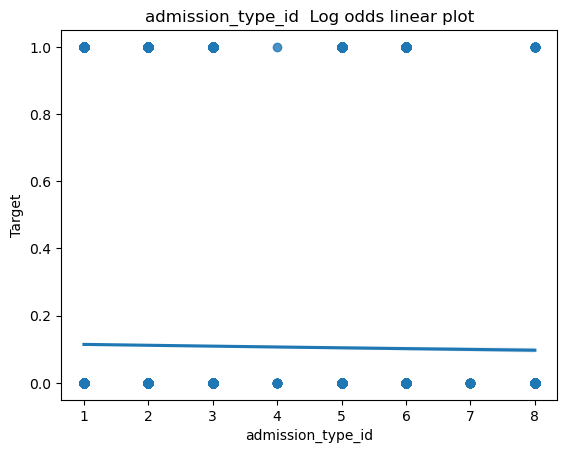

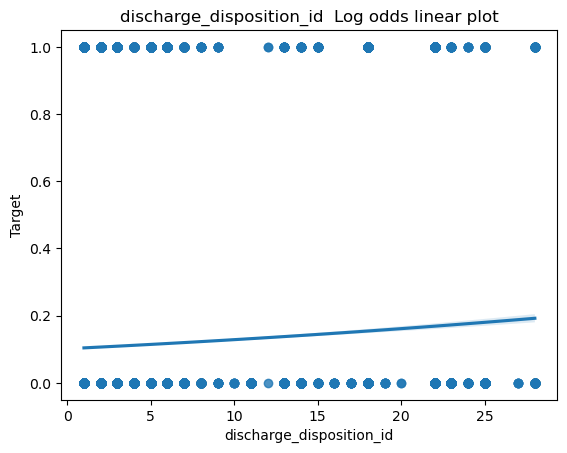

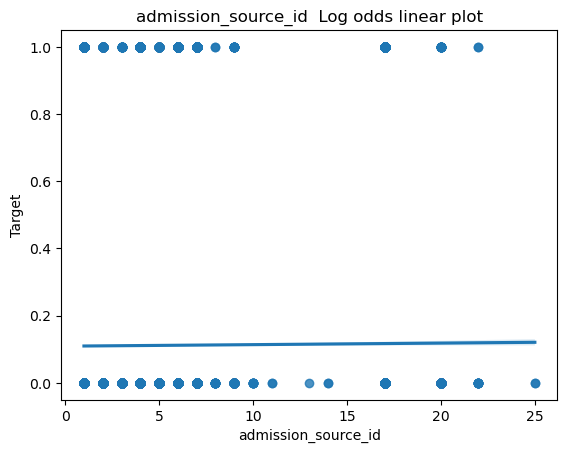

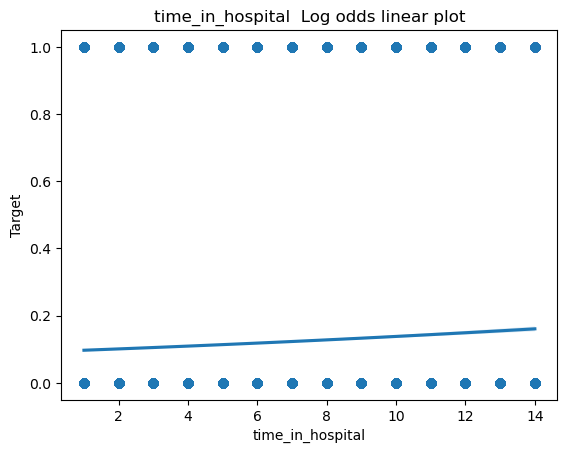

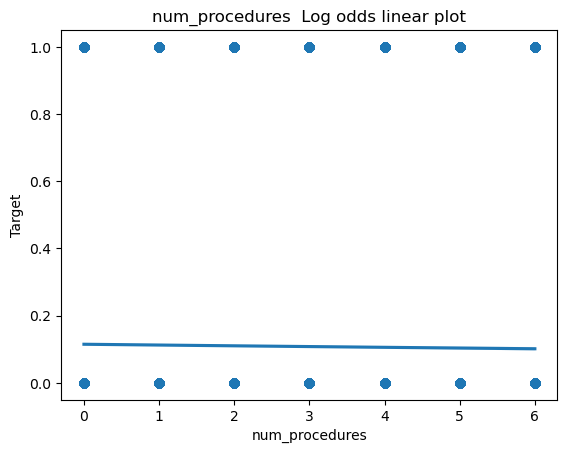

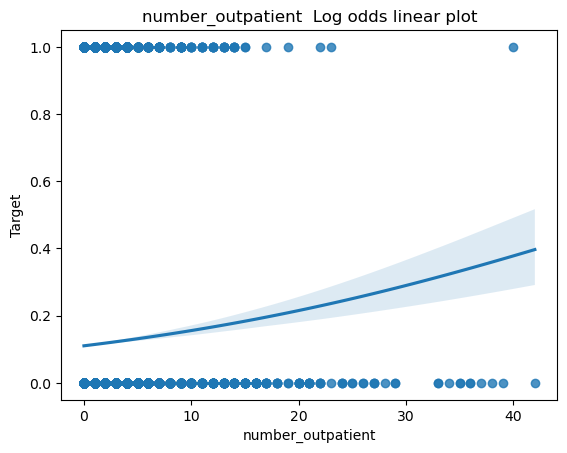

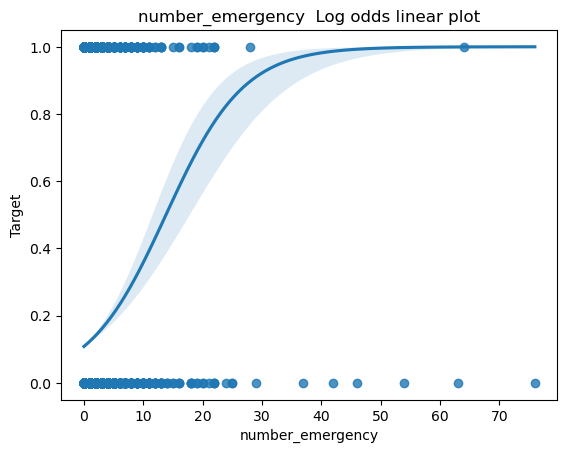

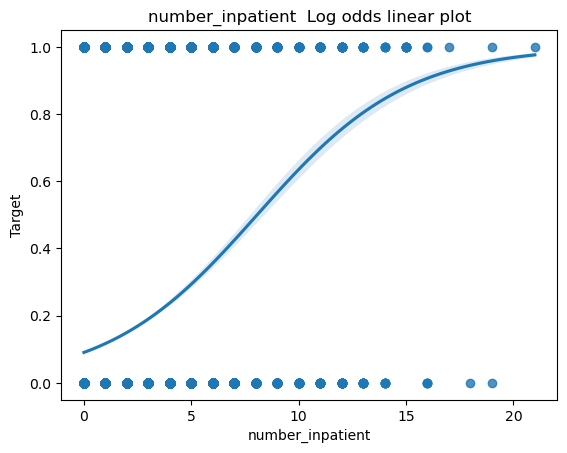

In [29]:
df2           =  data.loc[:, x_cols]
target        =  'Target'
for i in range(len(num_variables)):
    title = num_variables[i] + '  Log odds linear plot'
    xvar  = num_variables[i]
    check_linearity(xvar,    df2, title, target)

### Assumption 5 - Logistic regression requires quite a large number of observations.

In [31]:
#Number of events (cases where Response == 1)
num_events = data['Target'].sum()

# Number of predictor variables (excluding 'Response')
num_predictors = len(X_collinear.columns)

# Number of events per predictor variable
events_per_predictor = num_events / num_predictors

print("Number of events:", num_events)
print("Number of predictor variables:", num_predictors)
print("Events per predictor:", events_per_predictor)

Number of events: 11357.0
Number of predictor variables: 25
Events per predictor: 454.28


### Explanation:

We calculate the number of events by summing the 'Target' column, which represents the cases where the outcome of interest occurs.

We calculate the number of predictor variables by counting the number of columns in the DataFrame and excluding the outcome variable.

We divide the number of events by the number of predictor variables to get the events per predictor.

We can then compare the calculated events per predictor with the recommended guideline of 10-20. If the ratio is below this guideline, it may indicate a potential violation of the assumption of a sufficiently large sample size.

### Observations:

With 11357 events and 25 predictor variables, the calculated number of events per predictor is approximately 454.28. This exceeds the commonly recommended guideline of having at least 10-20 events per predictor variable.

Inference: The dataset appears to meet the assumption of having a sufficiently large sample size for logistic regression.

Having a high number of events per predictor variable suggests that there should be adequate statistical power and precision in estimating the model parameters, enhancing the reliability of the logistic regression analysis. Therefore, the dataset likely provides a robust basis for fitting a logistic regression model and conducting statistical inference.